<a href="https://colab.research.google.com/github/piyushrajtiwari/campusworkshop/blob/master/Project_movies_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Understanding Data and Importing Libraries
2.   Load data.
3.   EDA,feature engg
4.   Model selection
5.   evaluation








#**Understanding of data**

In Dataset we have:

'MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country','BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD',
'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating',
'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director',
'LeadActor - ALL columns

This dataset is about movies boxoffice collection we need find box_office

we Perform regression model to predict it.


#**Importing Libraries**

In [ ]:
!pip install category_encoders


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from category_encoders import BinaryEncoder
from sklearn.model_selection import cross_val_score, KFold

#**Loading Dataset**

In [ ]:
df = pd.read_csv('/content/movies_dataset.csv')

In [ ]:
df.shape

(999999, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

In [ ]:
df.describe()

,MovieID,ReleaseYear,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT
count,999999.000000,999999.000000,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000,999999.000000,999999.000000,999999.000000
mean,500000.000000,1998.001220,9.802824e+06,1.496163e+07,2.720625e+07,2.992745e+06,7.483442e+06,6.494788,64.776426,9137.184011,2031.880340
std,288674.990255,19.260863,2.249421e+07,3.879403e+07,6.954294e+07,8.132438e+06,1.955337e+07,1.485606,17.592474,24922.362780,8433.380602
min,1.000000,1950.000000,1.000000e+05,4.002547e+04,1.000000e+05,4.050470e+03,1.650742e+04,1.000000,0.000000,100.000000,50.000000
25%,250000.500000,1984.000000,1.190511e+06,1.489805e+06,2.762370e+06,2.790262e+05,7.383145e+05,5.500000,53.000000,1083.000000,119.000000
50%,500000.000000,2001.000000,3.265790e+06,4.388876e+06,8.090223e+06,8.387221e+05,2.179436e+06,6.500000,65.000000,2983.000000,405.000000
75%,749999.500000,2014.000000,9.002791e+06,1.287606e+07,2.355245e+07,2.510360e+06,6.415143e+06,7.500000,77.000000,8192.000000,1360.000000
max,999999.000000,2025.000000,3.000000e+08,1.018198e+09,1.499497e+09,2.957511e+08,5.795551e+08,10.000000,100.000000,1000000.000000,500000.000000


#**Missing Values**

In [ ]:
df.isna().sum()

,0
MovieID,0
Title,0
Genre,0
ReleaseYear,0
ReleaseDate,0
Country,0
BudgetUSD,0
US_BoxOfficeUSD,0
Global_BoxOfficeUSD,0
Opening_Day_SalesUSD,0


In [ ]:
df[df['Global_BoxOfficeUSD'].isna()]

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor


<Axes: >

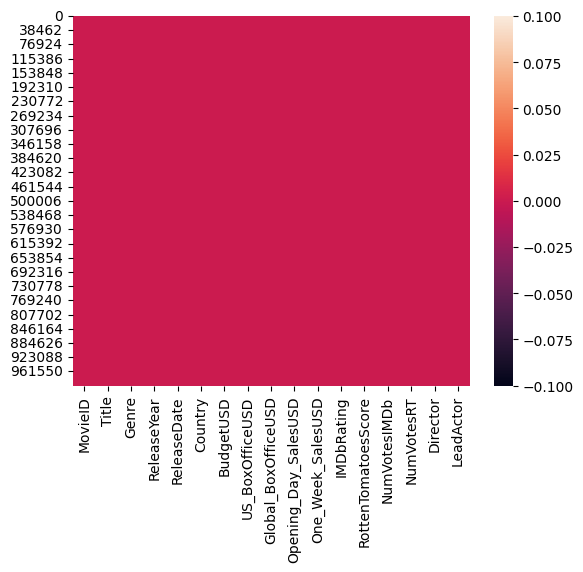

In [ ]:
sns.heatmap(df.isna())

In [ ]:
# df['BudgetUSD']
x=df.dropna(subset=['BudgetUSD'])


(array([9.30486e+05, 4.33750e+04, 1.25960e+04, 5.36200e+03, 2.84900e+03,
        1.59100e+03, 1.01400e+03, 6.54000e+02, 4.42000e+02, 1.63000e+03]),
 array([1.0000e+05, 3.0090e+07, 6.0080e+07, 9.0070e+07, 1.2006e+08,
        1.5005e+08, 1.8004e+08, 2.1003e+08, 2.4002e+08, 2.7001e+08,
        3.0000e+08]),
 <BarContainer object of 10 artists>)

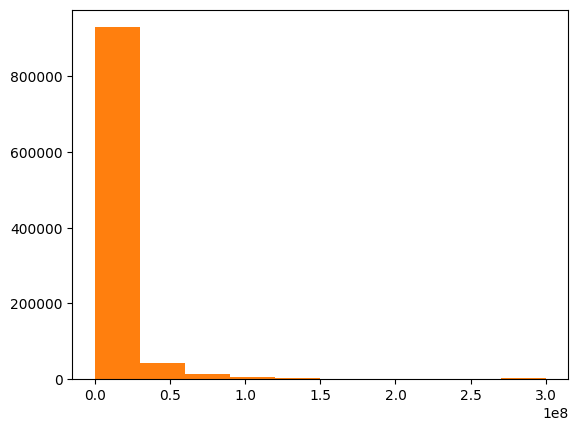

In [ ]:
plt.hist(df['BudgetUSD'])
plt.hist(x['BudgetUSD'])

###**Droping Missing values:**

In [ ]:
df.dropna(subset=['BudgetUSD'],inplace=True)

###**Varification:**

In [ ]:
df.isna().sum()

,0
MovieID,0
Title,0
Genre,0
ReleaseYear,0
ReleaseDate,0
Country,0
BudgetUSD,0
US_BoxOfficeUSD,0
Global_BoxOfficeUSD,0
Opening_Day_SalesUSD,0


Conclusion:


1.   As there are a few missing values in it.
2.   I have investigated that, in the same columns, I find all   missing values
3.   So I will drop it, as it does no chnage in distrubution some we can drop affect.





#**EDA**

In [ ]:
df.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS


In [ ]:
df.select_dtypes(include=np.number).columns

Index(['MovieID', 'ReleaseYear', 'BudgetUSD', 'US_BoxOfficeUSD',
       'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD',
       'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index(['Title', 'Genre', 'ReleaseDate', 'Country', 'Director', 'LeadActor'], dtype='object')

##**Univariant analysis** -- Numerical

###**BudgetUSD**

In [ ]:
df['BudgetUSD'].describe()

,BudgetUSD
count,9.999990e+05
mean,9.802824e+06
std,2.249421e+07
min,1.000000e+05
25%,1.190511e+06
50%,3.265790e+06
75%,9.002791e+06
max,3.000000e+08


<Axes: ylabel='Frequency'>

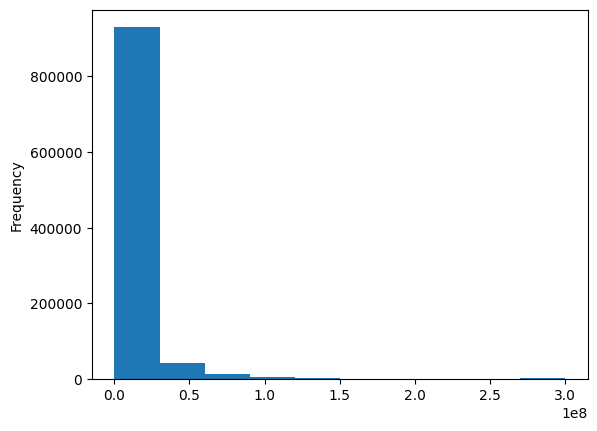

In [ ]:
df['BudgetUSD'].plot(kind='hist')

<Axes: xlabel='BudgetUSD', ylabel='Density'>

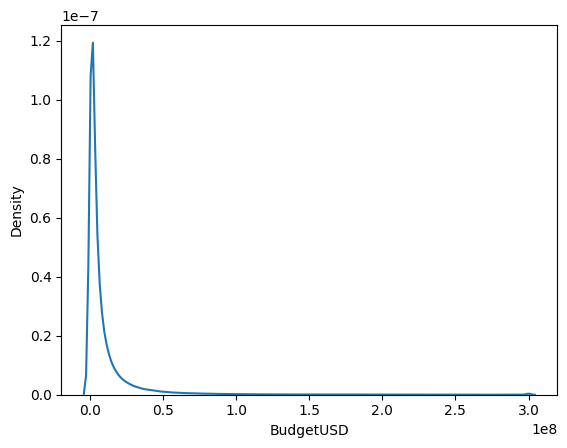

In [ ]:
sns.kdeplot(data=df,x='BudgetUSD')

<Axes: ylabel='BudgetUSD'>

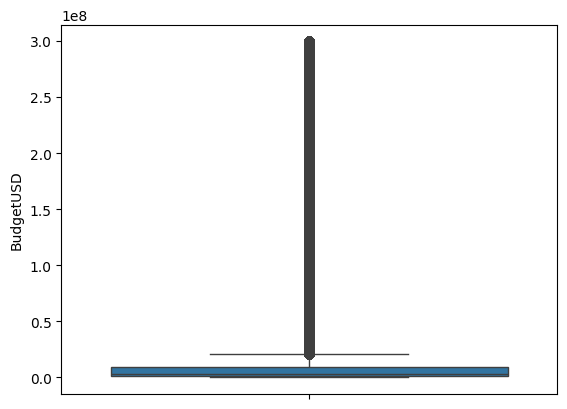

In [ ]:
sns.boxplot(data=df,y='BudgetUSD')

In [ ]:
df['BudgetUSD'].skew()

np.float64(6.9118842578401365)

###**Opening_Day_SalesUSD**

In [ ]:
df['Opening_Day_SalesUSD'].describe()

,Opening_Day_SalesUSD
count,9.999990e+05
mean,2.992745e+06
std,8.132438e+06
min,4.050470e+03
25%,2.790262e+05
50%,8.387221e+05
75%,2.510360e+06
max,2.957511e+08


<Axes: ylabel='Frequency'>

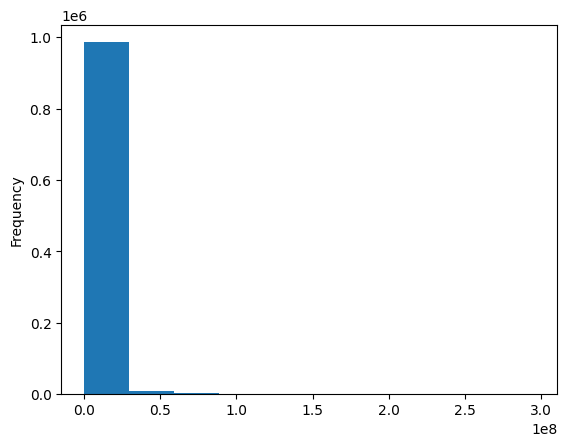

In [ ]:
df['Opening_Day_SalesUSD'].plot(kind='hist')

<Axes: xlabel='Opening_Day_SalesUSD', ylabel='Density'>

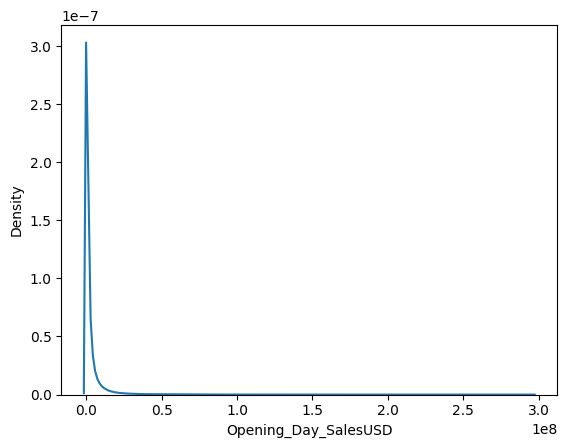

In [ ]:
sns.kdeplot(data=df,x='Opening_Day_SalesUSD')

<Axes: >

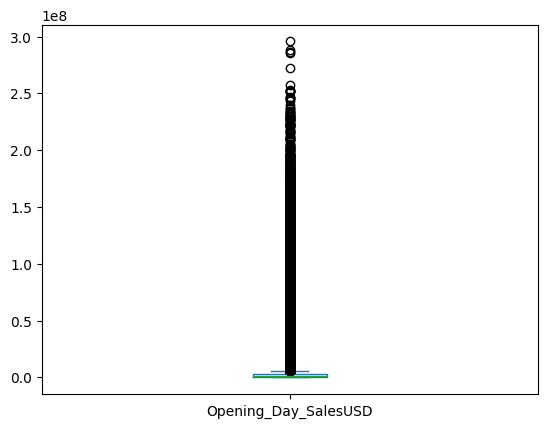

In [ ]:
df['Opening_Day_SalesUSD'].plot(kind='box')

In [ ]:
df['Opening_Day_SalesUSD'].skew()

np.float64(9.910032361645241)

###**One_Week_SalesUSD**

In [ ]:
df['One_Week_SalesUSD'].describe()

,One_Week_SalesUSD
count,9.999990e+05
mean,7.483442e+06
std,1.955337e+07
min,1.650742e+04
25%,7.383145e+05
50%,2.179436e+06
75%,6.415143e+06
max,5.795551e+08


<Axes: ylabel='Frequency'>

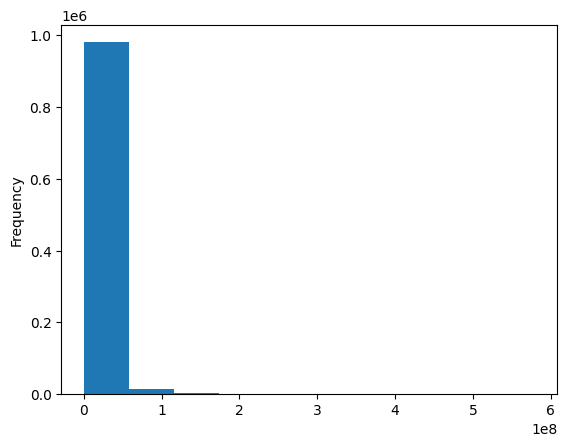

In [ ]:
df['One_Week_SalesUSD'].plot(kind='hist')

<Axes: xlabel='One_Week_SalesUSD', ylabel='Density'>

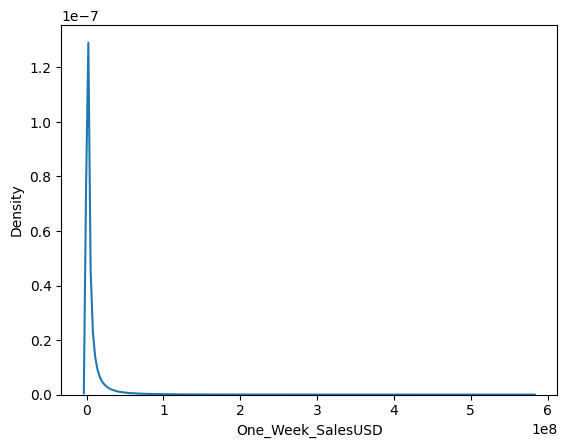

In [ ]:
sns.kdeplot(data=df,x='One_Week_SalesUSD')

<Axes: >

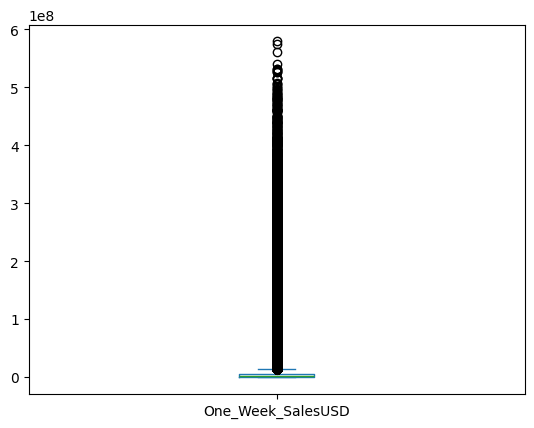

In [ ]:
df['One_Week_SalesUSD'].plot(kind='box')

In [ ]:
df['One_Week_SalesUSD'].skew()

np.float64(9.010582464727966)

###**IMDbRating**

In [ ]:
df['IMDbRating'].describe()

,IMDbRating
count,999999.000000
mean,6.494788
std,1.485606
min,1.000000
25%,5.500000
50%,6.500000
75%,7.500000
max,10.000000


<Axes: ylabel='Frequency'>

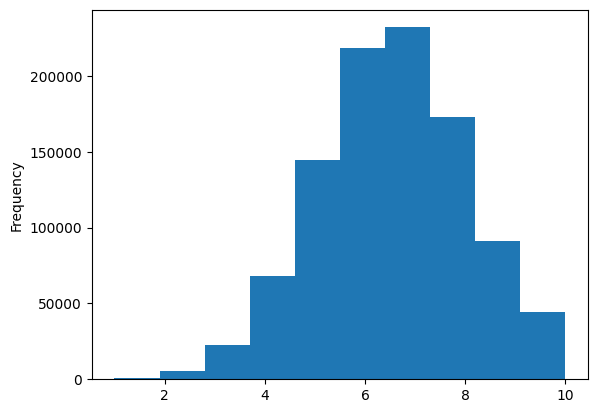

In [ ]:
df['IMDbRating'].plot(kind='hist')

<Axes: xlabel='IMDbRating', ylabel='Density'>

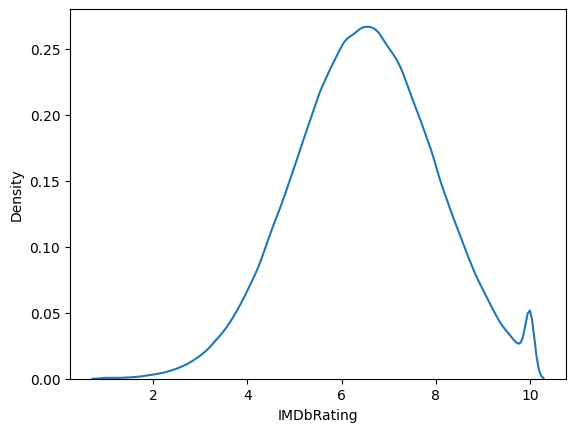

In [ ]:
sns.kdeplot(data=df,x='IMDbRating')

<Axes: >

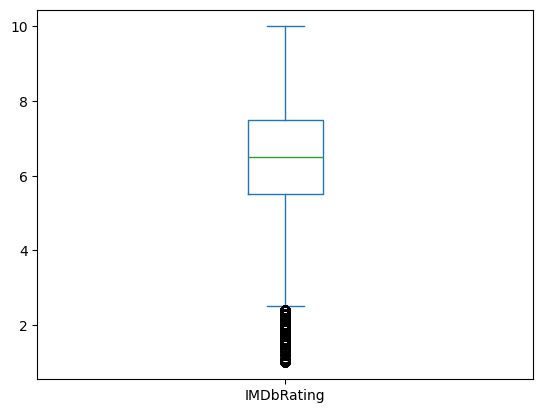

In [ ]:
df['IMDbRating'].plot(kind='box')

In [ ]:
df['IMDbRating'].skew()

np.float64(-0.06153094539008476)

###**RottenTomatoesScore**

In [ ]:
df['RottenTomatoesScore'].describe()

,RottenTomatoesScore
count,999999.000000
mean,64.776426
std,17.592474
min,0.000000
25%,53.000000
50%,65.000000
75%,77.000000
max,100.000000


<Axes: ylabel='Frequency'>

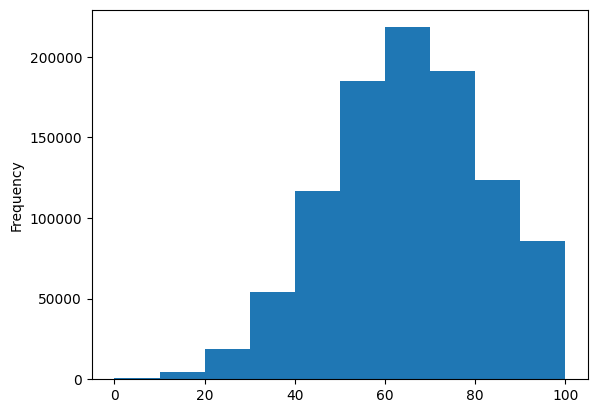

In [ ]:
df['RottenTomatoesScore'].plot(kind='hist')

<Axes: xlabel='RottenTomatoesScore', ylabel='Density'>

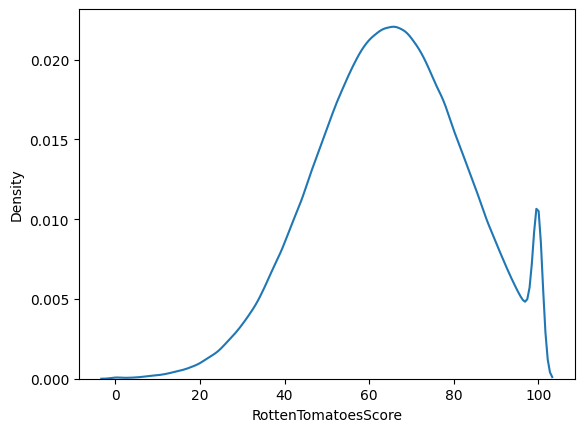

In [ ]:
sns.kdeplot(data=df,x='RottenTomatoesScore')

<Axes: >

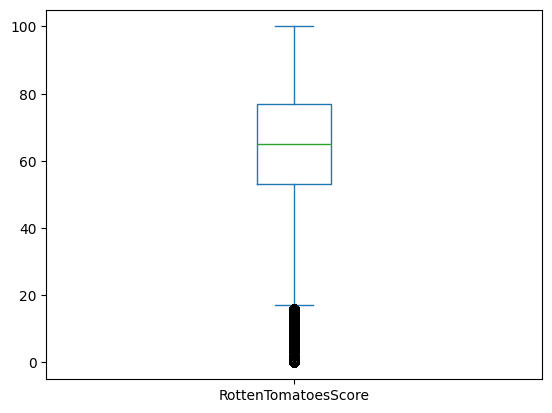

In [ ]:
df['RottenTomatoesScore'].plot(kind='box')

In [ ]:
df['RottenTomatoesScore'].skew()

np.float64(-0.14464463523558685)

###**NumVotesIMDb and NumVotesRT**





In [ ]:
df['NumVotesIMDb'].describe()

,NumVotesIMDb
count,999999.000000
mean,9137.184011
std,24922.362780
min,100.000000
25%,1083.000000
50%,2983.000000
75%,8192.000000
max,1000000.000000


<Axes: ylabel='Frequency'>

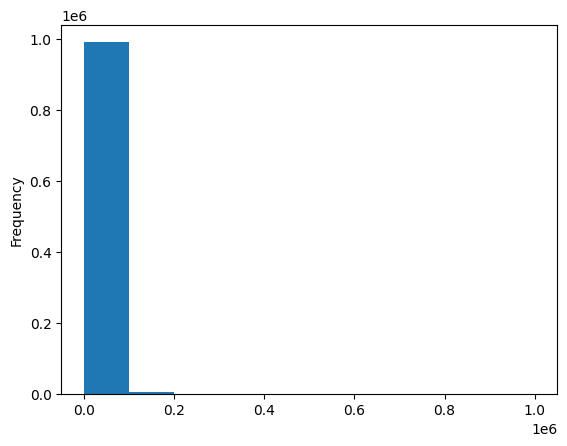

In [ ]:
df['NumVotesIMDb'].plot(kind='hist')

<Axes: xlabel='NumVotesIMDb', ylabel='Density'>

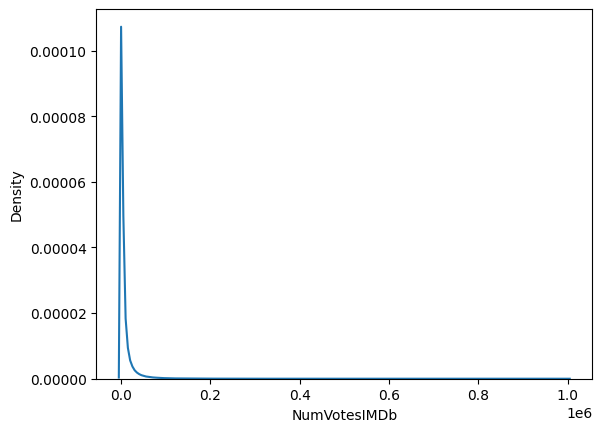

In [ ]:
sns.kdeplot(data=df,x='NumVotesIMDb')

<Axes: >

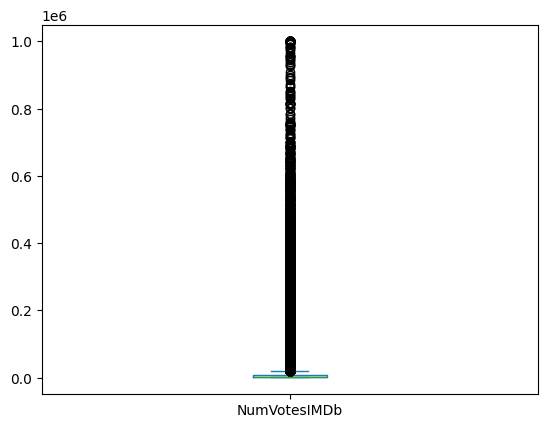

In [ ]:
df['NumVotesIMDb'].plot(kind='box')

In [ ]:
df['NumVotesIMDb'].skew()

np.float64(14.166662138642149)

In [ ]:
df['NumVotesRT'].describe()

,NumVotesRT
count,999999.000000
mean,2031.880340
std,8433.380602
min,50.000000
25%,119.000000
50%,405.000000
75%,1360.000000
max,500000.000000


<Axes: ylabel='Frequency'>

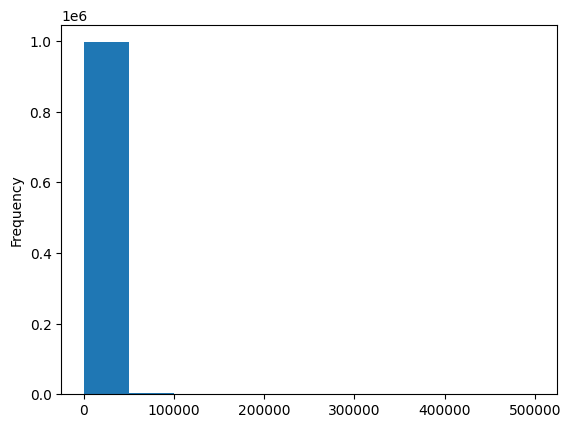

In [ ]:
df['NumVotesRT'].plot(kind='hist')

<Axes: xlabel='NumVotesRT', ylabel='Density'>

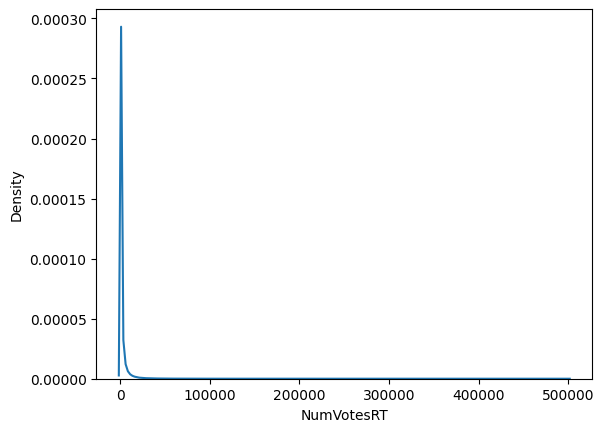

In [ ]:
sns.kdeplot(data=df,x='NumVotesRT')

In [ ]:
df['NumVotesRT'].skew()

np.float64(22.75174910156043)

##**Univariant analysis -- CATEGORIES**

###**Country**

In [ ]:
df['Country'].value_counts()

,count
Country,
USA,714581
UK,51277
India,50984
Canada,40528
China,30952
Australia,30587
France,30471
Japan,20222
Germany,20211


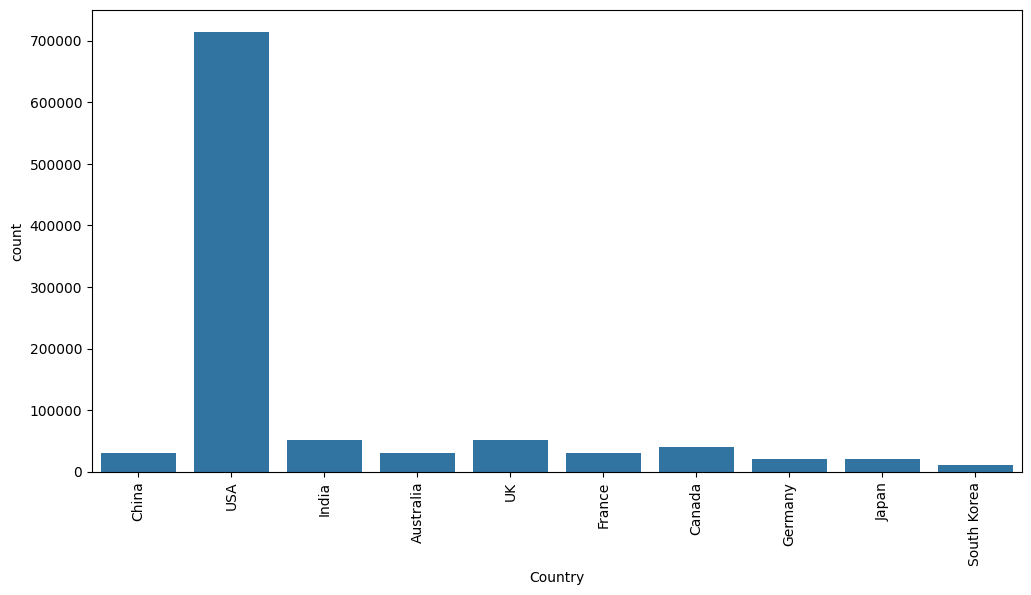

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country')
plt.xticks(rotation=90)
plt.show()


### **Genre**

In [ ]:
df['Genre'].value_counts()

,count
Genre,
Drama,250018
Comedy,199832
Action,150131
Thriller,100071
Romance,100021
Horror,100010
Documentary,50114
Sci-Fi,49802


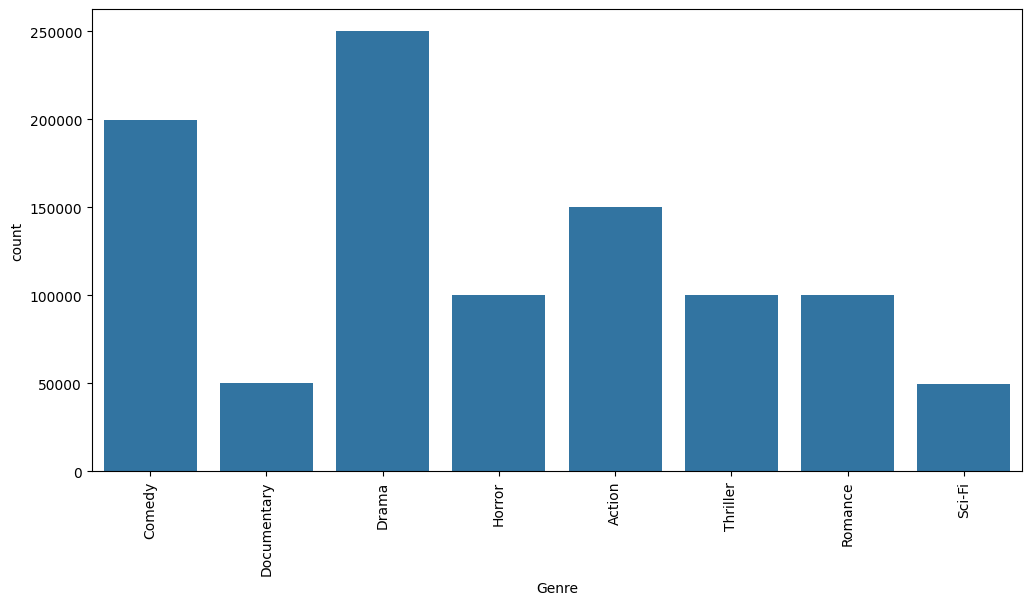

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90)
plt.show()

###**ReleaseDate**

In [ ]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], dayfirst=True, errors='coerce')


In [ ]:
df['ReleaseDate'].isna().sum()

np.int64(0)

**Feature engginering**

In [ ]:
df['month'] = df['ReleaseDate'].dt.month_name()
df['month1'] = df['ReleaseDate'].dt.month
df['year'] = df['ReleaseDate'].dt.year
df['date'] = df['ReleaseDate'].dt.day
df['week'] = df['ReleaseDate'].dt.isocalendar().week



In [ ]:
df.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,...,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor,month,month1,year,date,week
0,1,Might toward capital,Comedy,2003,2003-09-28,China,6577427.79,6613685.82,15472035.66,1778530.85,...,58,7865,10596,Kristina Moore,Brian Mccormick,September,9,2003,28,39
1,2,He however experience,Comedy,1988,1988-02-14,USA,1883810.10,1930949.15,3637731.12,247115.74,...,44,1708,220,Benjamin Hudson,Ashley Pena,February,2,1988,14,6
2,3,Star responsibility politics,Comedy,1971,1971-11-02,USA,2468079.29,4186694.69,7165111.24,878453.95,...,55,4678,7805,Kayla Young,Alexander Haley,November,11,1971,2,44
3,4,Exactly live,Comedy,1998,1998-08-06,USA,1447311.46,2023683.92,4373820.26,570657.72,...,87,2467,1751,Michael Ross,Patrick Barnett,August,8,1998,6,32
4,5,Focus improve especially,Documentary,2021,2021-12-17,India,900915.86,2129629.10,3113017.38,361189.37,...,67,5555,697,Faith Franklin,Duane Fletcher DDS,December,12,2021,17,50


## **Bivariant** -Numerical





<Axes: xlabel='BudgetUSD', ylabel='Global_BoxOfficeUSD'>

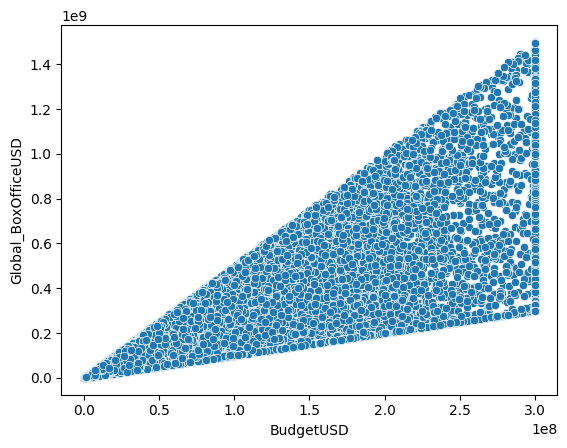

In [ ]:
# df['BudgetUSD'], df['Global_BoxOfficeUSD']
sns.scatterplot(data=df,x='BudgetUSD',y='Global_BoxOfficeUSD')


<Axes: xlabel='One_Week_SalesUSD', ylabel='Global_BoxOfficeUSD'>

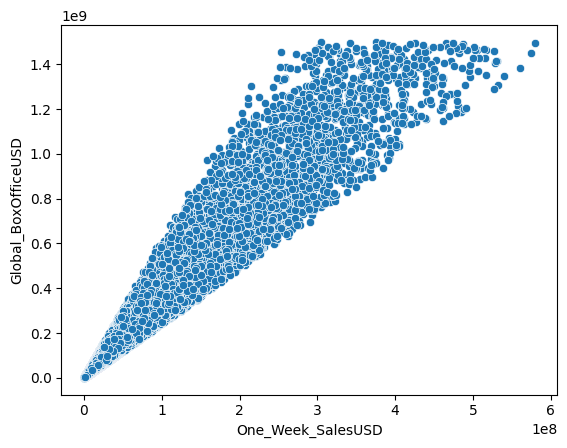

In [ ]:
sns.scatterplot(data=df,x='One_Week_SalesUSD',y='Global_BoxOfficeUSD')

<Axes: xlabel='Opening_Day_SalesUSD', ylabel='Global_BoxOfficeUSD'>

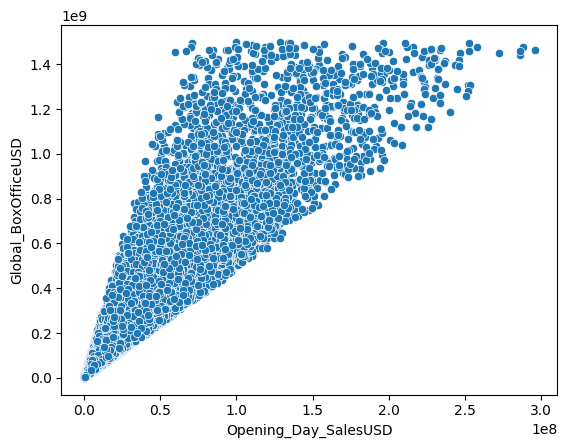

In [ ]:
sns.scatterplot(data=df,x='Opening_Day_SalesUSD',y='Global_BoxOfficeUSD')

<Axes: xlabel='IMDbRating', ylabel='Global_BoxOfficeUSD'>

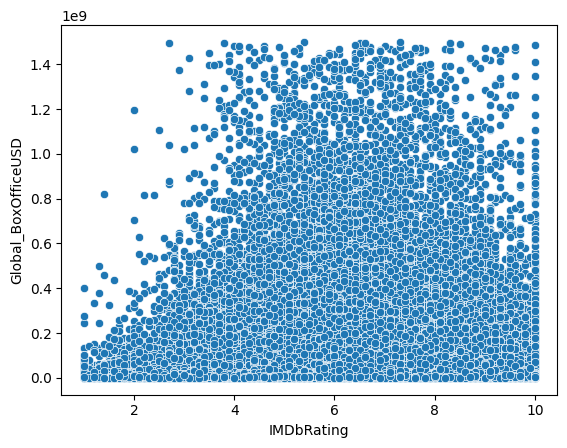

In [ ]:
sns.scatterplot(data=df,x='IMDbRating',y='Global_BoxOfficeUSD')

<Axes: xlabel='RottenTomatoesScore', ylabel='Global_BoxOfficeUSD'>

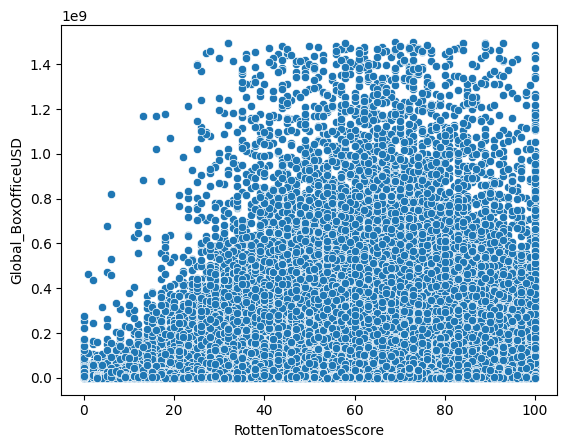

In [ ]:
sns.scatterplot(data=df,x='RottenTomatoesScore',y='Global_BoxOfficeUSD')


## **Bivariant** -Category

<Axes: xlabel='Country', ylabel='Global_BoxOfficeUSD'>

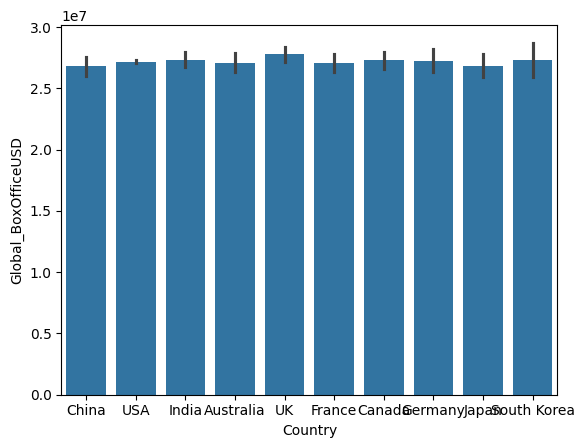

In [ ]:
sns.barplot(data=df,x='Country',y='Global_BoxOfficeUSD')

<Axes: xlabel='Genre', ylabel='Global_BoxOfficeUSD'>

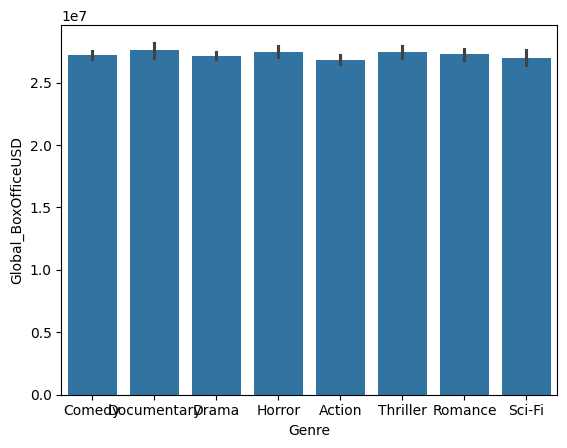

In [ ]:
sns.barplot(data=df,x='Genre',y='Global_BoxOfficeUSD')

##**Chicking multicolinearity**

In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country',
       'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD',
       'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating',
       'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director',
       'LeadActor', 'month', 'month1', 'year', 'date', 'week'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select numeric columns (excluding the target variable)
X = df[['BudgetUSD', 'US_BoxOfficeUSD', 'Opening_Day_SalesUSD',
        'One_Week_SalesUSD', 'IMDbRating', 'RottenTomatoesScore',
        'NumVotesIMDb', 'NumVotesRT',  'year']]

# Add constant column
X = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                Feature        VIF
0                 const   0.000000
1             BudgetUSD   4.528304
2       US_BoxOfficeUSD  80.280258
3  Opening_Day_SalesUSD  11.318520
4     One_Week_SalesUSD  66.115466
5            IMDbRating   3.200531
6   RottenTomatoesScore   3.200540
7          NumVotesIMDb   1.000006
8            NumVotesRT   1.000017
9                  year   1.000013


In [ ]:
df_clean = df.drop(columns=['US_BoxOfficeUSD', 'One_Week_SalesUSD'])


In [ ]:
num_cols = [
    'BudgetUSD', 'Opening_Day_SalesUSD',
    'IMDbRating', 'RottenTomatoesScore',
    'NumVotesIMDb', 'NumVotesRT', 'year'
]

X = df_clean[num_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
X = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                Feature           VIF
0                 const  10780.179007
1             BudgetUSD      3.428794
2  Opening_Day_SalesUSD      3.428781
3            IMDbRating      3.200530
4   RottenTomatoesScore      3.200537
5          NumVotesIMDb      1.000004
6            NumVotesRT      1.000010
7                  year      1.000009


##**Conclusion:**
1. The maximum movie budget is considered to be low or micro-budget
2. For few movies opening day sales is high but maximum is low
3. For few movies One_Week_SalesUSD is high but maximum is low
4. As it is not skew many movies have modrate to high imtb
5. RottenTomatoesScore is modarate to high, (crictics give maximum score)
6. Higher budget → higher probability of earning more money globally.
7. The movie is staying longer in the cinema hall change of earning money is high
8. Budget high movie earn more in first day and thier is some movie budget is small but earn good in first day
9. IMDb Rating shows a weak correlation with Global Box Office Revenue. High ratings do not guarantee commercial success, and commercially successful movies are not always critically acclaimed.

#**Feature selection**

In [ ]:
df_model = df.copy()

features = [
    'BudgetUSD', 'Opening_Day_SalesUSD', 'IMDbRating', 'RottenTomatoesScore',
    'NumVotesIMDb', 'NumVotesRT', 'year',
    'Genre', 'Country', 'Director', 'LeadActor'
]

target = 'Global_BoxOfficeUSD'

X = df_model[features]
y = df_model[target]


#**Model**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify columns

# numeric_features = ['BudgetUSD', 'Opening_Day_SalesUSD', 'IMDbRating',
#                     'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'year']

# categorical_features = ['Genre', 'Country', 'Director', 'LeadActor']

# # Preprocessing (One-Hot Encode + Scaling)

# preprocess = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),       # Scale only numeric
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ]
# )

numeric_features = ['BudgetUSD', 'Opening_Day_SalesUSD', 'IMDbRating',
                    'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'year']

categorical_features =  BinaryEncoder(cols=['Genre', 'Country', 'Director', 'LeadActor'])

# preprocess = ColumnTransformer(
#     transformers=[
#         # ('num', StandardScaler(), numeric_features),              # Scale only numeric
#         ('cat', BinaryEncoder(), categorical_features)            # Use Binary Encoding for categorical
#     ],
#     remainder='passthrough'
# )
X_train_enc = categorical_features.fit_transform(X_train)
X_test_enc = categorical_features.transform(X_test)



In [ ]:
#  Model pipelines


# models = {
#     # "SVM": SVR(kernel='rbf'),
#     # "KNN": KNeighborsRegressor(n_neighbors=5),
#     # "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42,n_jobs=-1)
#     RandomForestRegressor(
#     n_estimators=150,      # reduce trees (almost same accuracy)
#     max_depth=15,          # limit tree depth → huge time reduction
#     min_samples_split=10,  # avoid deep branching
#     n_jobs=-1,random_state=42)
# }
# models = {
#     "RandomForest": RandomForestRegressor(
#         n_estimators=150,
#         max_depth=15,
#         min_samples_split=10,
#         n_jobs=-1,
#         random_state=42
#     )
# }
models = RandomForestRegressor(
        n_estimators=150,
        max_depth=15,
        min_samples_split=10,
        n_jobs=-1,
        random_state=42
    )


In [ ]:
# for name, model in models.items():
#     pipeline = Pipeline(steps=[("preprocess", preprocess),
#                               ("model", model)])
models.fit(X_train_enc, y_train)
y_pred = models.predict(X_test_enc)



#**Evalution**

In [ ]:
# print(f"\n : {name} Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9361714785945431
RMSE: 17857800.569281805


In [ ]:
# #  5-Fold Cross Validation
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# cv_r2 = cross_val_score(models, X_train_enc, y_train, cv=kfold, scoring='r2', n_jobs=-1)
# cv_rmse = np.sqrt(-cross_val_score(models, X_train_enc, y_train, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1))

# print("===== Cross Validation Results =====")
# print(f"R2 Scores: {cv_r2}")
# print(f"Mean R2: {cv_r2.mean():.4f}")
# print(f"RMSE Scores: {cv_rmse}")
# print(f"Mean RMSE: {cv_rmse.mean():.4f}")